# Државни патишта

## Референци

1. [Државни патишта](http://185.229.27.3/roads/index.php?l=mk)
2. [Материјали за почеток со библиотеката пандас](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

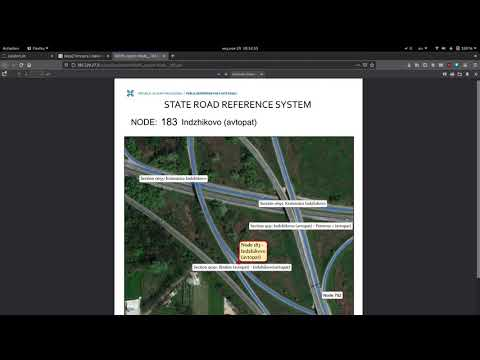

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('q4mVMeitrMA')

## Најкраток пат

Податоците за државните патишта кои можете да ги најдете на страната на Државни патишта се сместени во папката `roads` во `data`. Искористете ги податоците за да ја најдете најкратката патека од еден град до друг, на пример од Скопје до Пробиштип. Сите датотеки за наслов ја имаат кратенката на патот. Во датотеката `roads_info.csv` се содржани кратенките на патиштата и соодветниот опис за секој пат.

### Решение

In [2]:
import pandas as pd
from plotly import graph_objects as go
from graph import WeightedGraph
from search import uniform_cost_search

In [3]:
g = WeightedGraph()
files = pd.read_csv('data/roads/roads_info.csv')['Кратенка']
for file in files:
    df = pd.read_csv(f'data/roads/{file}.csv')
    df['ОД'] = df['ЈАЗОЛ НА ПОЧЕТОКОТ']
    df['ДО'] = df['ЈАЗОЛ НА КРАЈОТ']
    for row in df.itertuples():
        g.add_vertex(row.ОД)
        g.add_vertex(row.ДО)
        g.add_edge((row.ОД, row.ДО, row.ДОЛЖИНА))

In [4]:
def find_city(graph, city):
    for node in graph.vertices():
        if city.lower() in node.lower():
            print(node)

find_city(g, 'Пробиштип')
find_city(g, 'Нагоричане')

364 - Пробиштип
195 - Младо Нагоричане
378 - Старо Нагоричане 1
512 - Младо Нагоричане


In [ ]:
from time import time

In [10]:
%%time
weight, path, broj_na_razgraneti_jazli = uniform_cost_search(g, '364 - Пробиштип', '378 - Старо Нагоричане 1')
weight, path, broj_na_razgraneti_jazli

CPU times: total: 0 ns
Wall time: 0 ns


(59429,
 ['364 - Пробиштип',
  '363 - Кратово',
  '362 - Живалево',
  '193 - Страцин (Крилатица)',
  '194 - Војник',
  '195 - Младо Нагоричане',
  '378 - Старо Нагоричане 1'],
 57)

## Најкраток пат со А*

Во датотеката `coordinates.csv` се сместени X и Y координатите на секоја клучка. Координатите се `Гаус-Кригерови координати, 7-ма зона` (не пишува на страната на ЈП Државни Патишта, прашав геодет), па директно можете да ја примените равенката за евклидово растојание врз координатите. Искористете ја оваа дојава (евристика) за местоположбата на клучките и конструирајте А* алгоритам кој ќе го најде најкраткиот пат од едно до друго населено место.

### Решение

In [8]:
df = pd.read_csv('data/roads/coordinates.csv')

def eucledian_distance(vertex1, vertex2):
    vertex1 = int(vertex1.split('-')[0])
    vertex2 = int(vertex2.split('-')[0])
    vertex1 = df.query(f'Јазол == {vertex1}')
    vertex2 = df.query(f'Јазол == {vertex2}')
    import math
    delta_x_squared = math.pow(float(vertex1.X) - float(vertex2.X), 2)
    delta_y_squared = math.pow(float(vertex1.Y) - float(vertex2.Y), 2)
    return math.sqrt(delta_x_squared + delta_y_squared)

eucledian_distance('364 - Пробиштип', '378 - Старо Нагоричане 1')

C:\Users\Marko Velkovski\AppData\Local\Temp\ipykernel_17400\2240976341.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_x_squared = math.pow(float(vertex1.X) - float(vertex2.X), 2)
C:\Users\Marko Velkovski\AppData\Local\Temp\ipykernel_17400\2240976341.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_y_squared = math.pow(float(vertex1.Y) - float(vertex2.Y), 2)


36229.390811682366

In [11]:
%%time
from search import a_star_search
weight, path, broj_razgraneti_jazli = a_star_search(
    graph=g, 
    starting_vertex='364 - Пробиштип', 
    goal_vertex='378 - Старо Нагоричане 1', 
    heuristic_function=eucledian_distance, 
    alpha=1)
weight, path,broj_razgraneti_jazli

CPU times: total: 46.9 ms
Wall time: 44.1 ms


C:\Users\Marko Velkovski\AppData\Local\Temp\ipykernel_17400\2240976341.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_x_squared = math.pow(float(vertex1.X) - float(vertex2.X), 2)
C:\Users\Marko Velkovski\AppData\Local\Temp\ipykernel_17400\2240976341.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_y_squared = math.pow(float(vertex1.Y) - float(vertex2.Y), 2)
C:\Users\Marko Velkovski\AppData\Local\Temp\ipykernel_17400\2240976341.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_x_squared = math.pow(float(vertex1.X) - float(vertex2.X), 2)
C:\Users\Marko Velkovski\AppData\Local\Temp\ipykernel_17400\2240976341.py:10: FutureWarning: Calling float on a single element Serie

(59429,
 ['364 - Пробиштип',
  '363 - Кратово',
  '362 - Живалево',
  '193 - Страцин (Крилатица)',
  '194 - Војник',
  '195 - Младо Нагоричане',
  '378 - Старо Нагоричане 1'],
 13)